# K-Means Clustering

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [28]:
dataset = pd.read_csv('Customers.csv', delimiter=",")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
X = dataset.iloc[:,3:].values

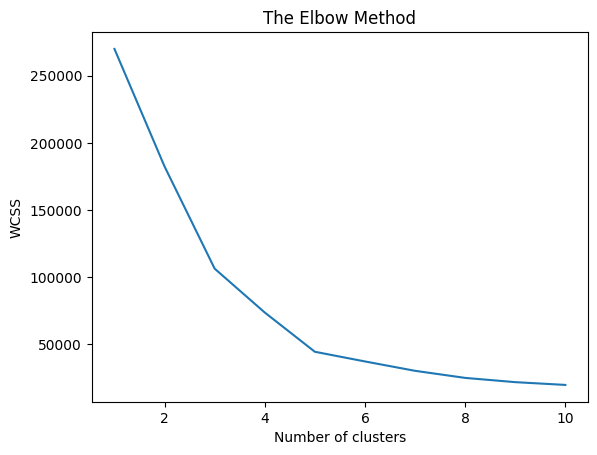

In [30]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 10):
    kmeans =  KMeans(n_clusters = n_clusters, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Küme Sayısı = {n_clusters}, Silhouette Score = {silhouette_avg}")

Küme Sayısı = 2, Silhouette Score = 0.2918426367691145
Küme Sayısı = 3, Silhouette Score = 0.46761358158775435
Küme Sayısı = 4, Silhouette Score = 0.4931963109249047
Küme Sayısı = 5, Silhouette Score = 0.553931997444648
Küme Sayısı = 6, Silhouette Score = 0.5379675585622219
Küme Sayısı = 7, Silhouette Score = 0.5288104473798049
Küme Sayısı = 8, Silhouette Score = 0.45407359550241166
Küme Sayısı = 9, Silhouette Score = 0.4565077334305076


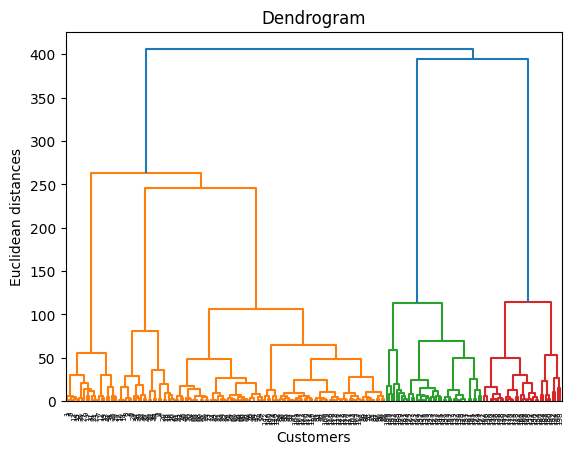

In [32]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init=10)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 2 4 1 4 2 4 2 4 1 4 2 4 2 4 2 4 2 4 1 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


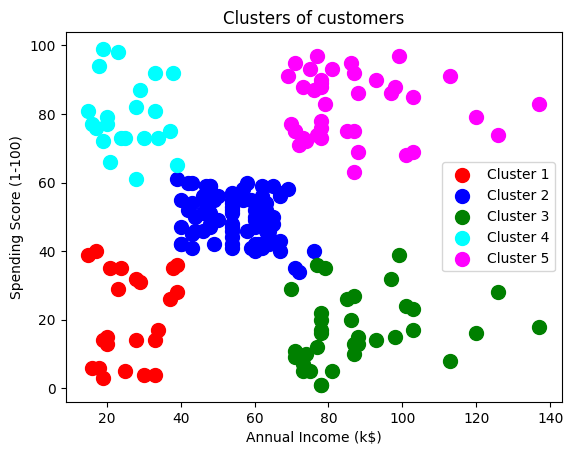

In [34]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [35]:
y_kmeans_df = pd.DataFrame(data=y_kmeans,columns=["Kategori"])

In [36]:
all_df = pd.concat([dataset,y_kmeans_df],axis=1)
all_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Kategori
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,2
197,198,Male,32,126,74,4
198,199,Male,32,137,18,2
